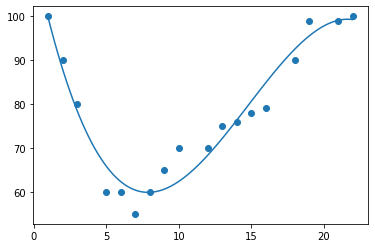

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [3]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

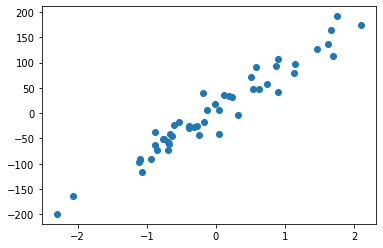

In [4]:
plt.scatter(X, y)

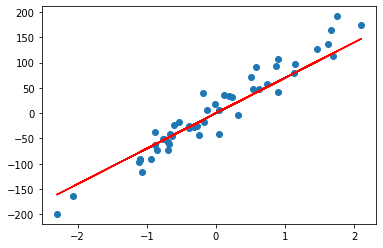

In [7]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

### Implementaion of Ridge regression

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

$$
    b_{rigde} = (X'X + nI)^{-1}@X'Y
$$

where

$$
    X'X = X^{T} @ X
$$

In [10]:
def fit_1d_ridge_regression(X_t, y_t, lmb=0.01):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    #TODO
    X_t = np.c_[np.ones(len(X_t)), X_t]
#     print(np.linalg.inv(np.dot(X.T, X) + lmb*np.eye(X.shape[1])))
#     print(np.dot(X.T, y))
    inverse_mat = np.linalg.inv(np.dot(X_t.T, X_t) + lmb * np.eye(X_t.shape[1]))
    beta = np.dot(inverse_mat, np.dot(X_t.T, y_t))
#     print()
#                          )
#     beta = np.c_[, beta]
    return beta


def predict(X_t, beta):
    return np.dot(beta[1:], X_t.T) + beta[0]

In [11]:
X.shape, y.shape

((50, 1), (50,))

In [12]:
w = fit_1d_ridge_regression(X, y, 0.01)

In [13]:
w

array([ 5.45955254, 84.91432112])

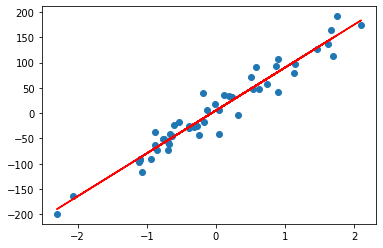

In [14]:
plt.scatter(X, y)
plt.plot(X, w[0]+w[1]*X, c='red')
plt.show()

### apply model to some data

In [15]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
# print(dataframe.shape)
# summarize first few lines
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
X = dataframe[dataframe.columns.difference([13])]
y = dataframe[13]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
beta = fit_1d_ridge_regression(X_train, y_train)
beta

array([ 2.97258401e+01, -1.12808363e-01,  3.02048204e-02,  3.97025380e-02,
        2.78024025e+00, -1.68968278e+01,  4.46441788e+00, -6.47115959e-03,
       -1.43988389e+00,  2.60429095e-01, -1.06206395e-02, -9.07378582e-01,
        1.24200142e-02, -5.07648850e-01])

In [19]:
mean_squared_error(y_test, predict(X_test, beta))

24.337193373946228